## Exerício de Regressão Logística

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid", palette="colorblind")

In [4]:
%matplotlib inline

In [5]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv'
df = pd.read_csv(caminho)

### Checando os dados

In [19]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Análise Exploratória

<Axes: xlabel='Age', ylabel='Count'>

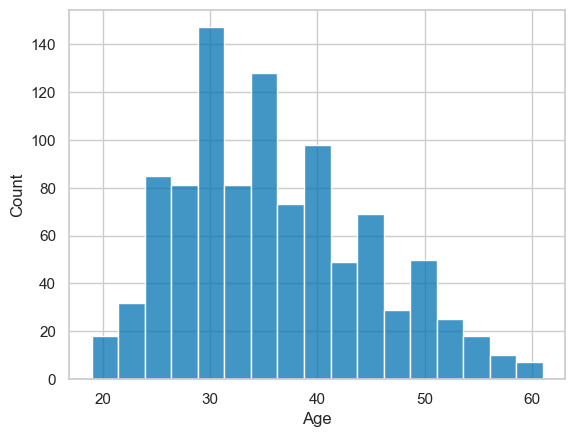

In [9]:
sns.histplot(x='Age', data=df)

In [10]:
corr = np.corrcoef(df['Age'], df['Area Income'])
corr = "Correlacao de \npearson: " + str(np.round(corr[0,1],2))

Text(0.65, 0.77, 'Correlacao de \npearson: -0.18')

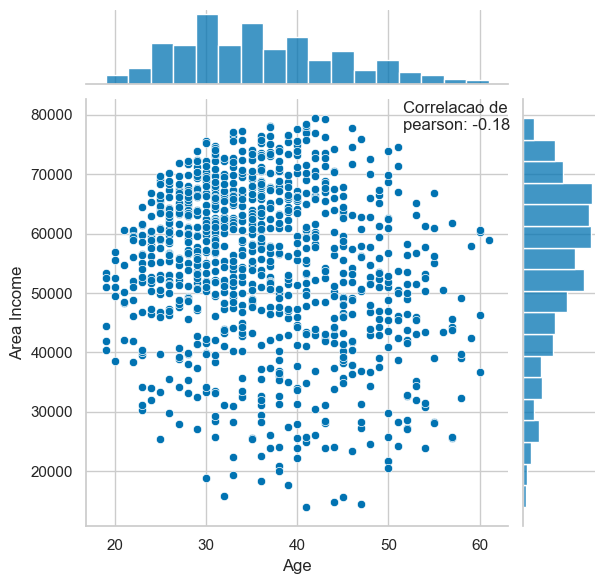

In [11]:
p = sns.jointplot(x='Age', y='Area Income', data=df )
p.fig.text(.65,0.77,corr)

In [12]:
corr = np.corrcoef(df['Age'], df['Daily Time Spent on Site'])
corr = "Correlacao de \npearson: " + str(np.round(corr[0,1],2))

/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


Text(0.65, 0.77, 'Correlacao de \npearson: -0.33')

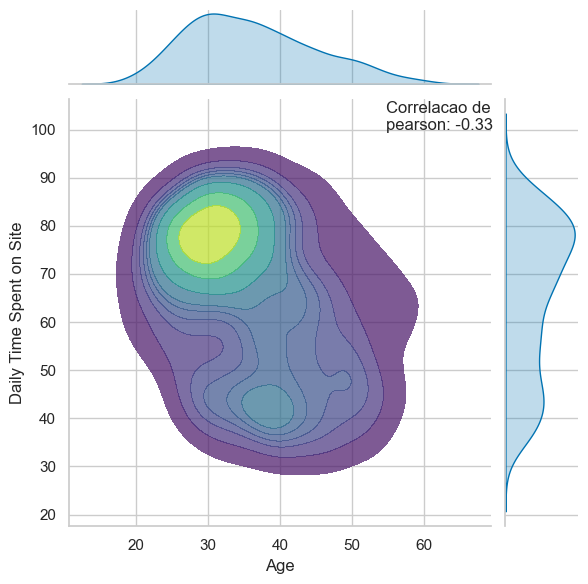

In [13]:
p = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde', cmap='viridis', fill=True, alpha=0.7, linewidth=0)
p.fig.text(0.65,0.77,corr)

In [14]:
corr = np.corrcoef(df['Daily Time Spent on Site'], df['Daily Internet Usage'])
corr = "Correlacao de \npearson: " + str(np.round(corr[0,1],2))

Text(0.65, 0.77, 'Correlacao de \npearson: 0.52')

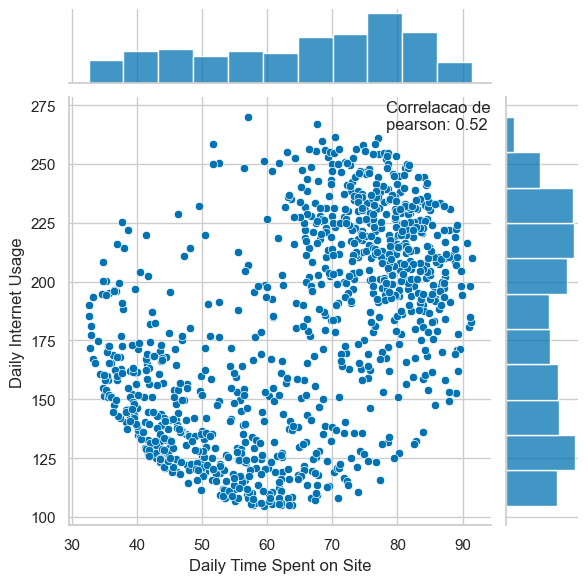

In [15]:
p = sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)
p.fig.text(0.65,0.77,corr)

In [31]:
vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


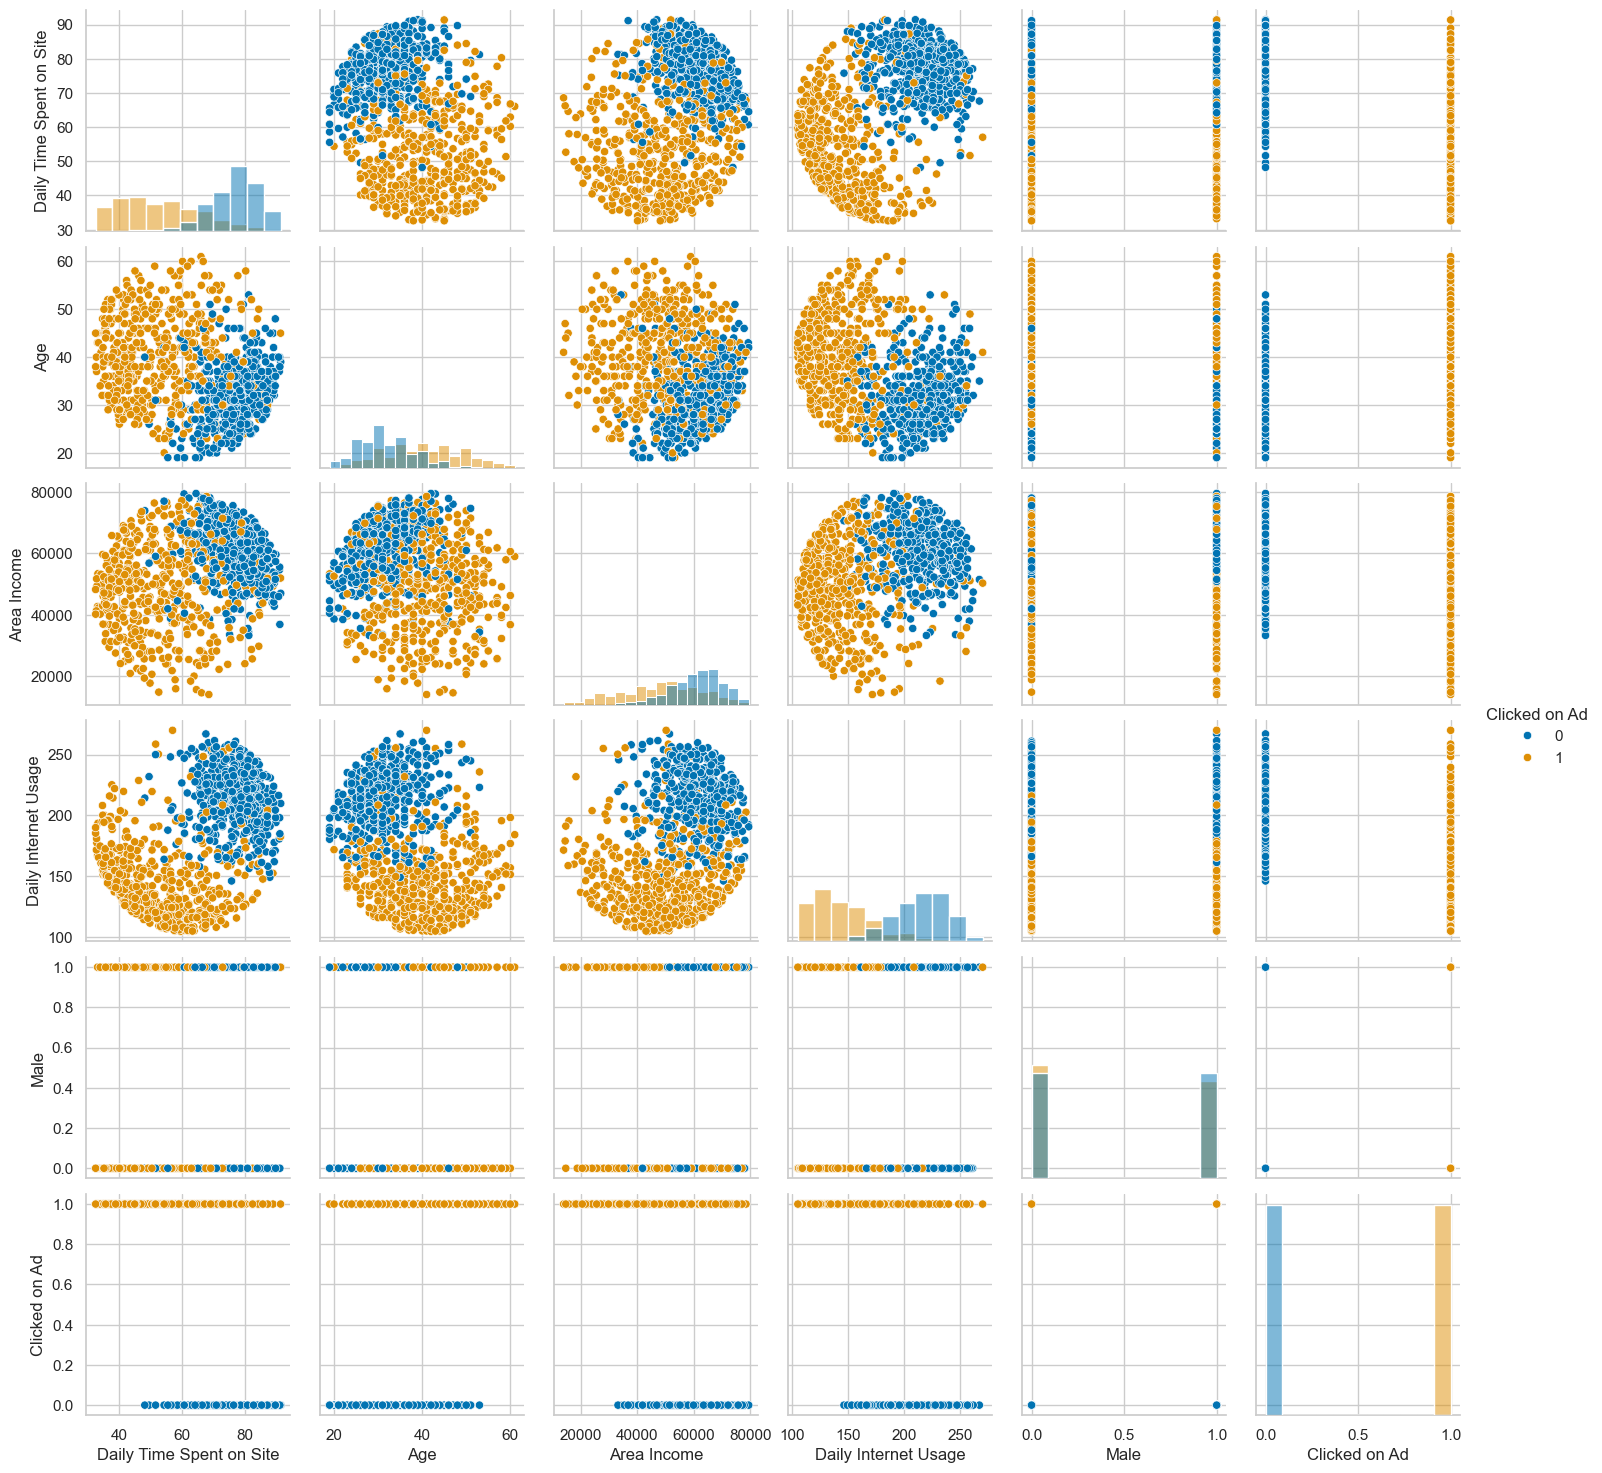

In [21]:
sns.pairplot(df, hue='Clicked on Ad', diag_kind='hist', vars=vars)

## Modelagem

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.loc[:,vars]
y = df.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic = LogisticRegression()

In [35]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [36]:
predicoes = logistic.predict(X_test)

### Avaliando o modelo

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [40]:
print(confusion_matrix(y_test,predicoes))

[[140   6]
 [ 25 129]]
